Grouper no Pandas:

Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html

    - Serve para agrupar conjuntos de dados do tipo datetime(data);
    

In [4]:
#Mudando a apresentação padrão dos graficos através da biblioteca seaborn:

from seaborn import set
set()

ModuleNotFoundError: No module named 'pandas.api.types'

In [ ]:
from datetime import datetime, timedelta
from pandas import Series
from random import randint


base = datetime.today() #dia inicial da minha requisição
base_times = 900 #dias que vou buscar a informação
date_list = [base - timedelta(days=x) for x in range(base_times)]
# diminua o dia inicial menos o dia x, para cada dia x na minha base total de dias

In [ ]:
frequencia = Series([randint(1, 10_000) for _ in range(base_times) ] , index = date_list)
frequencia.head()

2023-01-15 11:08:46.449238    9835
2023-01-14 11:08:46.449238    9428
2023-01-13 11:08:46.449238    5452
2023-01-12 11:08:46.449238    7512
2023-01-11 11:08:46.449238    9379
dtype: int64

- Buscando uma frequencia através do series.iloc[]:

        - Busca uma serie de dados definidas nos parametros do .iloc[], como por exemplo pegar do dia 0 até o dia 30 de um determinado mês;

In [ ]:
frequencia.iloc[0: 30]

2023-01-15 11:08:46.449238    9835
2023-01-14 11:08:46.449238    9428
2023-01-13 11:08:46.449238    5452
2023-01-12 11:08:46.449238    7512
2023-01-11 11:08:46.449238    9379
2023-01-10 11:08:46.449238    6959
2023-01-09 11:08:46.449238    5246
2023-01-08 11:08:46.449238    6920
2023-01-07 11:08:46.449238    1853
2023-01-06 11:08:46.449238    3390
2023-01-05 11:08:46.449238    6077
2023-01-04 11:08:46.449238    3995
2023-01-03 11:08:46.449238    3381
2023-01-02 11:08:46.449238    5925
2023-01-01 11:08:46.449238    1632
2022-12-31 11:08:46.449238     674
2022-12-30 11:08:46.449238    3838
2022-12-29 11:08:46.449238    8924
2022-12-28 11:08:46.449238    5761
2022-12-27 11:08:46.449238    2505
2022-12-26 11:08:46.449238    1048
2022-12-25 11:08:46.449238    8930
2022-12-24 11:08:46.449238    6685
2022-12-23 11:08:46.449238    9914
2022-12-22 11:08:46.449238    9214
2022-12-21 11:08:46.449238    1505
2022-12-20 11:08:46.449238    6445
2022-12-19 11:08:46.449238    1115
2022-12-18 11:08:46.

O grande porém de se utilizar o iloc[] para refinamento de datas é que para cada mês que gostaria de buscar seria necessário realizar uma nova solicitação ex: 
        - mês1 = frequencia.iloc[0: 30], mês2 = frequencia.iloc[30: 60], etc...;

Outro porém é que teriamos que inserir manualmente a quantidades de dias que tem no mês, uns com 30, 31, 28, 29...,
O que geraria mais trabalho e também maior chance de erro na analize dos dados;

Grouper:

- É um método do Pandas para buscar grupos de dados através de series temporais;

- Uma vantagem ao método do .iloc[], é definido o range da busca de forma mais clara sobre um periodo de tempo como uma requisição de agrupamento de dados por mês:

        g = Grouper(freq='1M') <> variavel = Grouper(frequencia_da_requisição='1M')

- O proprio Grouper irá fazer os filtros dos meses, por exemplo se o mês tem 30 dias irá puxar os 30 dias, se tiver 28 irá puxar 28 dias e etc...;




In [1]:
from pandas import Grouper

g = Grouper(freq='1M') #agrupa pra mim na frequência de 1 mês de dados!
f = Grouper(freq='1Y') #agrupa pra mim na frequência de 1 ano de dados!

ModuleNotFoundError: No module named 'pandas.api.types'

- Groupby:

    - Agrupadores:
            ano='1Y',
            mes='1M', 
            semana='1W',

            
    Cria um containner de dados com a Serie e a frequência solicitada;
    
    serie.groupby(g) #pega essa serie e groupeia ela com base no g(g neste caso é a variavel construida anteriormente indicando o agrupamento de dados por 1 mês)
    
    ex: <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001BD87B706A0>

In [ ]:
frequencia.groupby(g)

- Containner contendo várias informações: 

- Para acessar dados basta:     

            serie.groupby(x).método   <>    frequencia.groupby(g).count

      



  -count()    ->  apresenta a serie por grupos e pela frequencia especificada;
    
        frequencia.groupby(g).count

In [ ]:
frequencia.groupby(g).count()

NameError: name 'frequencia' is not defined

- Também é possível tornar esses dados um gráfico como visto anteriormente:

        serie.groupby(freq=).plot()     <>      frequencia.groupby(g).plot()

2020-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2020-10-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-30    AxesSubplot(0.125,0.2;0.775x0.68)
2020-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
2021-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2021-05-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2021-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2021-10-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-11-30    AxesSubplot(0.125,0.2;0.775x0.68)
2021-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2022-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
2022-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
2022-03-31    AxesSubplot(0.125,0.2;0.77

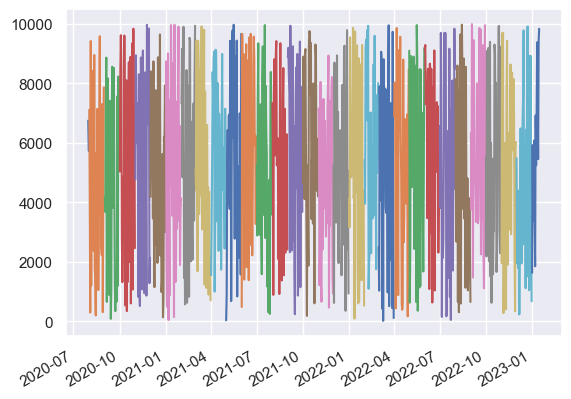

In [ ]:
frequencia.groupby(g).plot()

-   Porém como a busca é realizada no periódo de dias o gráfico apresentado não é muito visual se for aplicado para todos os dias.

-   Para melhorar a visualização do grafico podemos aplica-lo juntamente ao filtro .count() que irá nos retornar um grafico baseado no agrupamento de meses pelo periódo completo a requisitar:

        serie.groupby(freq=).count().plot()     <>      frequencia.groupby(g).count().plot()




<AxesSubplot: >

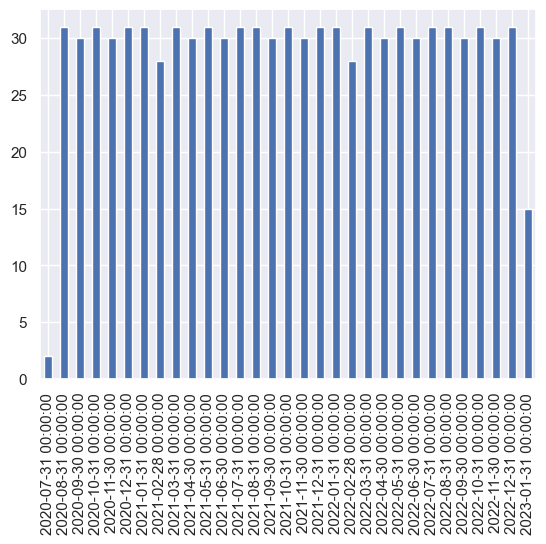

In [ ]:
frequencia.groupby(g).count().plot(kind='bar')
 

Como visto ao usar o .count().plot() ele irá mostrar graficamente a frequencia de dias nos meses solicitados, informação que neste caso não serve para muita coisa!



- Para apresentar graficamente as informações relevantes na nossa serie, podemos somar os valores dentro da frequencia especificada, e apartir dai apresenta-la graficamente.

        ex: some os dados que foram reunidos todos os dias, e separe ele por mês, após isso apresente um gráfico em barras para apresentação dos dados.

        serie.groupby(freq=).sum().plot(kind='barh')    <>      frequencia.groupby(g).sum().plot(kind='barh')        

<AxesSubplot: >

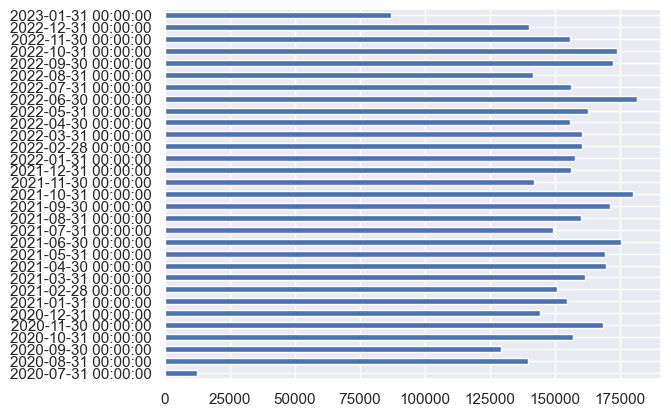

In [ ]:
frequencia.groupby(g).sum().plot(kind='barh')

Podemos também somar os dados dentro do periodo da frequencia da serie:

        serie.groupby(freq=).sum()      <>      frequencia.groupby(g).sum()

In [ ]:
frequencia.groupby(f).sum()

NameError: name 'frequencia' is not defined

<AxesSubplot: >

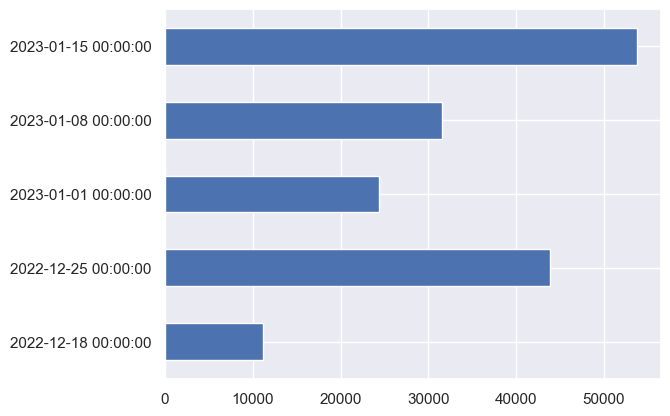

In [ ]:
frequencia.iloc[0: 30].groupby(Grouper(freq='1W')).sum().plot(kind='barh')

EXEMPLOS DE REQUISIÇÕES:

-Pegue a serie (frequencia): 

    filtre a serie de dados no periodo de 30 dias (.iloc[0: 30]);
    
    separe os dados na frequencia semana ( .groupby(Grouper(freq='1W')) );

    some os dados (.sum());

    Apresente um gráfico dos dados (.plot());

Como visto os index's (etiquetas) dos gráficos ficam bem estranhas com a formatação padrão do .plot().

Para alterar os index's(etiquetas) podemos :

        variavel = serie.iloc[valor_inicial: valor_final]   <>      
        altera_index_plot   =   frequencia.iloc[0: 5]
        altera_index_plot.index = ['Dia 1', 'Dia 2', 'Dia 3', 'Dia 4', 'Dia 5']
        

In [ ]:
altera_index_plot   =   frequencia.iloc[0: 5]
altera_index_plot.index = ['Dia 1', 'Dia 2', 'Dia 3', 'Dia 4', 'Dia 5']

altera_index_plot

Dia 1    9835
Dia 2    9428
Dia 3    5452
Dia 4    7512
Dia 5    9379
dtype: int64

Mostrando graficamente:

<AxesSubplot: >

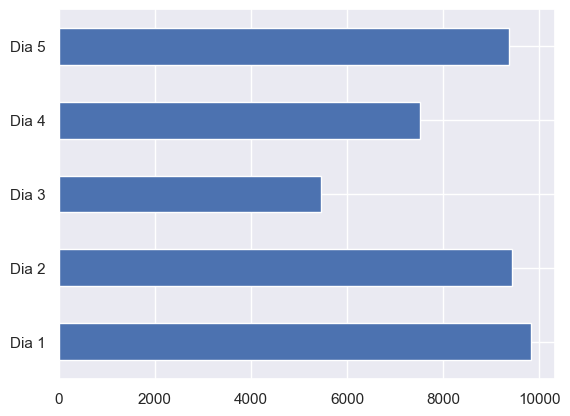

In [ ]:
altera_index_plot.plot(kind='barh')